## IMPORTING PACKAGES

In [1]:
#Imports
#Packages for numerics + dataframes
import numpy as np
import pandas as pd

#Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Packages for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## EXPLORATORY DATA ANALYSIS

In [2]:
#Loading dataframe
df = pd.read_csv("10.1 bank train.csv")
test_df = pd.read_csv("10.2 bank test.csv")

#EDA
print('''DATA EXPLORATION
Shape Of Dataframe: {}
Shape of Dataframe Post-Depulication: {}
Size of Dataframe: ({})
Total Count Of Missing Values: ({})'''.
format(df.shape,
       df.drop_duplicates().shape,
       df.size,df.isnull().sum().sum()))

print('\nDATA SUMMARY')
df.info()

print('\nDATA PREVIEW')
df.head()

DATA EXPLORATION
Shape Of Dataframe: (165034, 14)
Shape of Dataframe Post-Depulication: (165034, 14)
Size of Dataframe: (2310476)
Total Count Of Missing Values: (0)

DATA SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## DATA VISUALIZATION

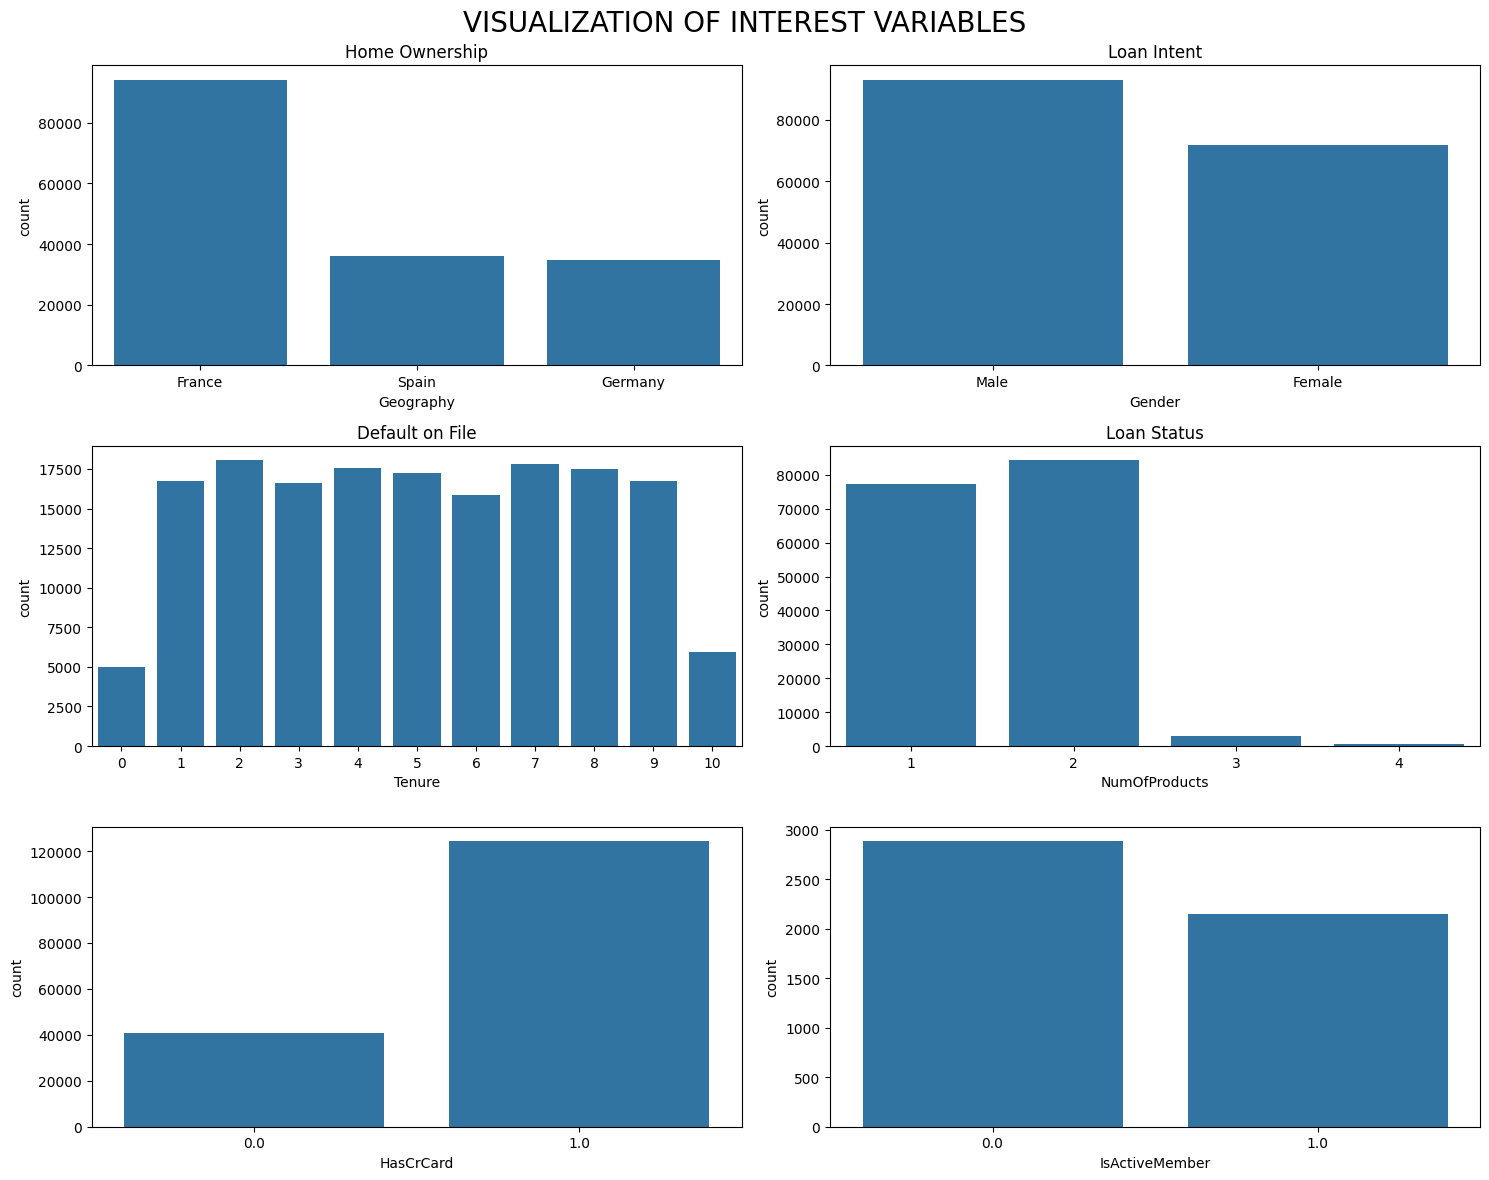

In [3]:
# Setting up subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
plt.suptitle("VISUALIZATION OF INTEREST VARIABLES", fontsize=20)

# Create visualizations
sns.barplot(df['Geography'].value_counts(), ax=ax[0,0])
sns.barplot(df['Gender'].value_counts(), ax=ax[0,1])
sns.barplot(df['Tenure'].value_counts(), ax=ax[1,0])
sns.barplot(df['NumOfProducts'].value_counts(), ax=ax[1,1])
sns.barplot(df['HasCrCard'].value_counts(), ax=ax[2,0])
sns.barplot((df['IsActiveMember'].value_counts()-80000), ax=ax[2,1])

# Set titles for each visualization
ax[0,0].set_title('Home Ownership')
ax[0,1].set_title('Loan Intent')
ax[1,0].set_title('Default on File')
ax[1,1].set_title('Loan Status')

plt.tight_layout()
plt.show()

## FEATURE ENGINEERING

In [4]:
df = pd.read_csv("10.1 bank train.csv")
test_df = pd.read_csv("10.2 bank test.csv")

# Drop unnecessary columns from the DataFrames
df = df.drop(['id', 'CustomerId'], axis=1)  # Drop 'id' and 'CustomerId' columns
df = pd.get_dummies(data=df, columns=['Geography', 'Gender'])  # One-hot encode categorical columns
df['Surname'] = df['Surname'].str.len()

# Repeat the same operations for the test DataFrame
test_df = test_df.drop(['id', 'CustomerId'], axis=1)  # Drop 'id' and 'CustomerId' columns
test_df = pd.get_dummies(data=test_df, columns=['Geography', 'Gender'])  # One-hot encode categorical columns
test_df['Surname'] = test_df['Surname'].str.len()

#Converting catergorical values to binary values
test_df.head()


,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,8,586,23.0,2,0.00,2,0.0,1.0,160976.75,True,False,False,True,False
1,4,683,46.0,2,0.00,1,1.0,0.0,72549.27,True,False,False,True,False
2,2,656,34.0,7,0.00,2,1.0,0.0,138882.09,True,False,False,True,False
3,9,681,36.0,8,0.00,1,1.0,0.0,113931.57,True,False,False,False,True
4,7,752,38.0,10,121263.62,1,1.0,0.0,139431.00,False,True,False,False,True


## MODEL PREP

In [5]:
#Defining X and y variables
y = df.Exited
X = df.drop(columns=['Exited'], axis=1)

#Generating train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.25, 
                                                    random_state=42)

#Generating dataframe for split
split = pd.DataFrame(data={"Dimensions":[X_train.shape, 
                                         X_test.shape, 
                                         y_train.size, 
                                         y_test.size]},
                    index=["X Train", "X Test", "Y Train" ,"Y Test"])

#Previewing split
split

,Dimensions
X Train,"(123775, 14)"
X Test,"(41259, 14)"
Y Train,123775
Y Test,41259


In [6]:
# Initialize empty lists to store results
Model = []
Accuracy = []
Precision = []
F1 = []
Recall = []
ROC_AUC = []

# Generating function to store and display results
def resultify(name_or_results, test=None, pred=None):
    """
    Processes results if test and pred are provided, 
    or displays results if passed with no additional arguments.
    """
    
    # If called with no test/pred arguments, display the results DataFrame
    if test is None and pred is None:
        return pd.DataFrame(
            data={'Accuracy': Accuracy,
                  'Precision': Precision,
                  'Recall': Recall,
                  'F1': F1,
                  'ROC AUC': ROC_AUC},
            index=Model
        )
    
    # Ensure all required arguments are provided for result processing
    if not (test is None or pred is None):
        # Generate evaluation scores
        accuracy_value = round(accuracy_score(test, pred) * 100, 0)
        precision_value = round(precision_score(test, pred) * 100, 0)
        recall_value = round(recall_score(test, pred) * 100, 0)
        f1_value = round(f1_score(test, pred) * 100, 0)
        roc_auc_value = round(roc_auc_score(test, pred) * 100, 0)
        
        # Append values to lists
        Model.append(name_or_results)
        Accuracy.append(f"{accuracy_value}%")
        Precision.append(f"{precision_value}%")
        Recall.append(f"{recall_value}%")
        F1.append(f"{f1_value}%")
        ROC_AUC.append(f"{roc_auc_value}%")

## INITIALIZING MODELS

In [7]:
#Initializing first base classifier
rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)

#Initializing second base classifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

#Initializing third base classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42).fit(X_train, y_train)

print("CLASSIFIERS READY")

CLASSIFIERS READY


## PREDICTIONS

In [8]:
#Generating predictions
rfc_pred = rfc.predict(X_test)
resultify("RANDOM FOREST", y_test, rfc_pred) #Applying resultify

#Generating predictions
gbc_pred = gbc.predict(X_test)
resultify("GRADIENT BOOSTING", y_test, gbc_pred) #Applying resultify

#Generating predictions
xgb_pred = xgb.predict(X_test)
resultify("X GRADIENT BOOSTING", y_test, xgb_pred) #Applying resultify

In [9]:
#Displaying results
resultify('results')

,Accuracy,Precision,Recall,F1,ROC AUC
RANDOM FOREST,86.0%,73.0%,53.0%,61.0%,74.0%
GRADIENT BOOSTING,86.0%,75.0%,53.0%,62.0%,74.0%
X GRADIENT BOOSTING,86.0%,74.0%,56.0%,64.0%,75.0%


## CONFUSION MATRICES

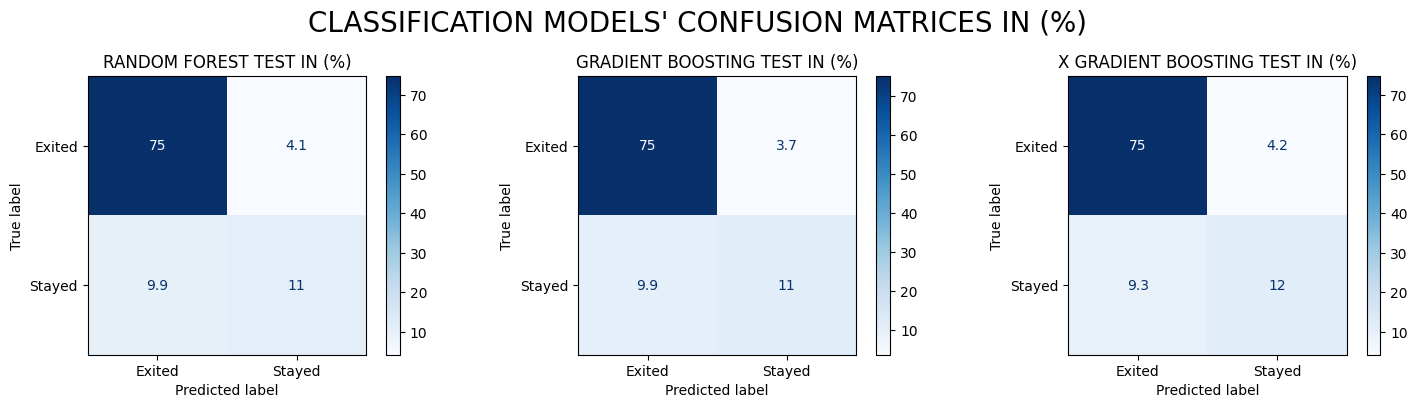

In [10]:
#Defining confusion matricies 
rfc_cm = confusion_matrix(y_test, rfc_pred, normalize="all")*100
gbc_cm = confusion_matrix(y_test, gbc_pred, normalize="all")*100
xgb_cm = confusion_matrix(y_test, xgb_pred, normalize="all")*100

#Generating subplots
fig, ax = plt.subplots(1,3, figsize=(15,4))
plt.suptitle("CLASSIFICATION MODELS' CONFUSION MATRICES IN (%)", fontsize=20)

#Generating visualizations
ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=['Exited', 'Stayed']).plot(cmap='Blues', ax=ax[0])
ConfusionMatrixDisplay(confusion_matrix=gbc_cm, display_labels=['Exited', 'Stayed']).plot(cmap='Blues', ax=ax[1])
ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=['Exited', 'Stayed']).plot(cmap='Blues', ax=ax[2])

#Labelling subplots
ax[0].set_title("RANDOM FOREST TEST IN (%)")
ax[1].set_title("GRADIENT BOOSTING TEST IN (%)")
ax[2].set_title("X GRADIENT BOOSTING TEST IN (%)")
plt.tight_layout(pad=1.5)

## FEATURE IMPORTANCE

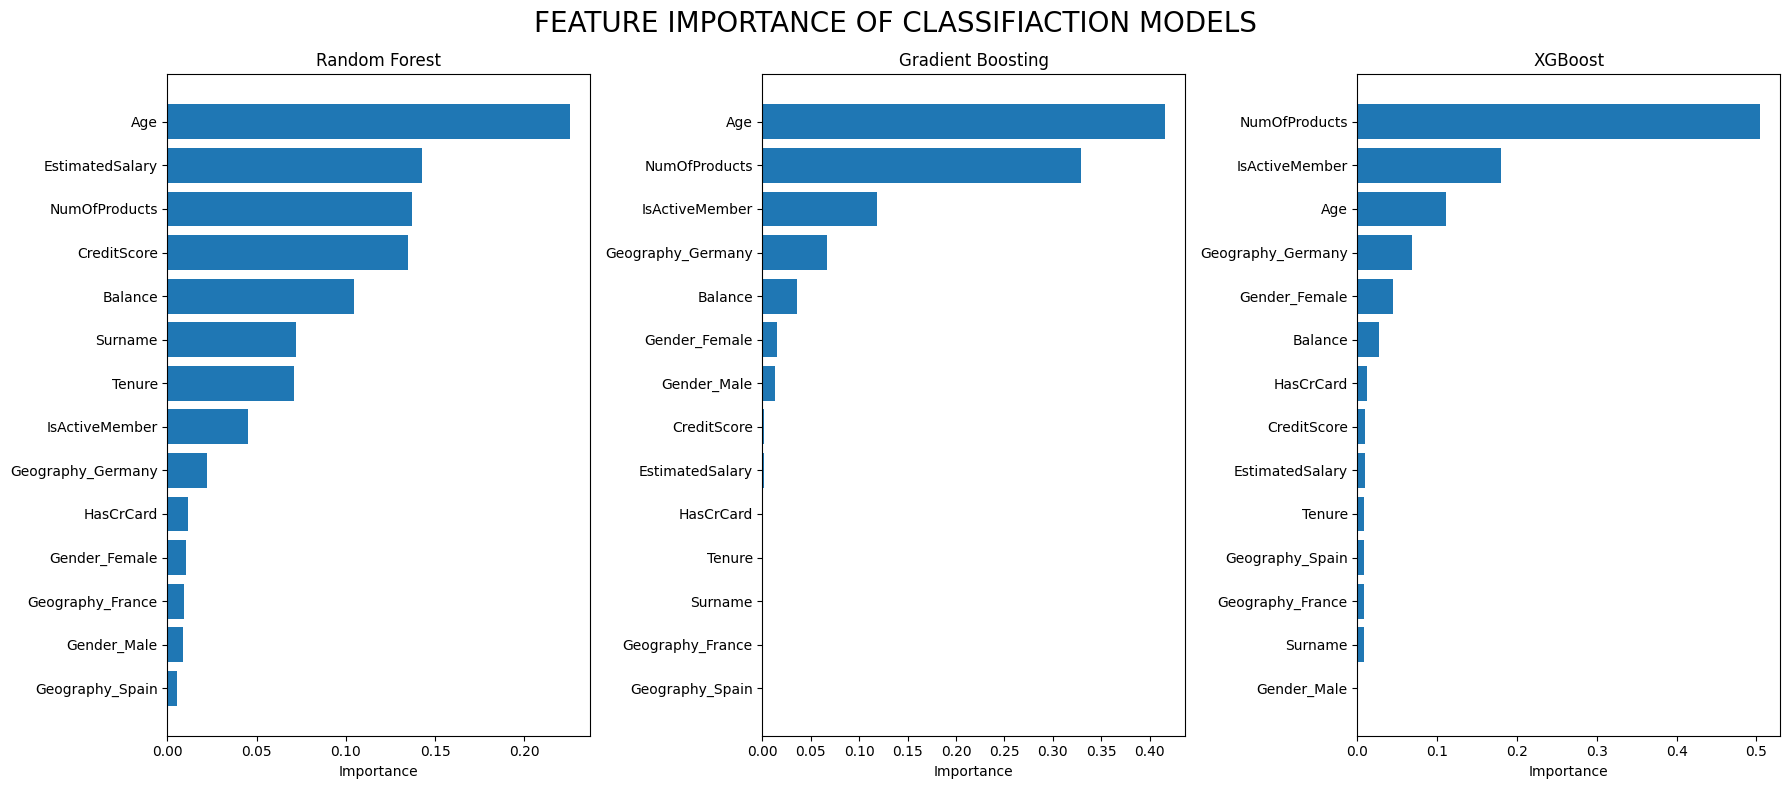

In [11]:
# Get feature importances
rfc_importances = rfc.feature_importances_
gbc_importances = gbc.feature_importances_
xgb_importances = xgb.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in ascending order
rfc_sorted_idx = np.argsort(rfc_importances)
gbc_sorted_idx = np.argsort(gbc_importances)
xgb_sorted_idx = np.argsort(xgb_importances)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 8))
plt.suptitle("FEATURE IMPORTANCE OF CLASSIFIACTION MODELS", fontsize=20)

# Plot feature importances for RandomForestClassifier
ax[0].barh(feature_names[rfc_sorted_idx], rfc_importances[rfc_sorted_idx])
ax[0].set_title("Random Forest")
ax[0].set_xlabel("Importance")

# Plot feature importances for GradientBoostingClassifier
ax[1].barh(feature_names[gbc_sorted_idx], gbc_importances[gbc_sorted_idx])
ax[1].set_title("Gradient Boosting")
ax[1].set_xlabel("Importance")

# Plot feature importances for XGBClassifier
ax[2].barh(feature_names[xgb_sorted_idx], xgb_importances[xgb_sorted_idx])
ax[2].set_title("XGBoost")
ax[2].set_xlabel("Importance")

plt.tight_layout()
plt.show()

## SUBMISSION

In [12]:
#Generating dataframe for testing data
submission_df = pd.DataFrame(data={'id': np.arange(165034, 275057),
                                   'loan_status': xgb.predict(test_df)})

#Generating submission csv
#submission_df.to_csv('10.3 Submission.csv', index=False)

#Previewing predictions
submission_df.head(5)

,id,loan_status
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0
